# Crawling Pipeline

이번 챕터에서는 크롤링 → 저장 → 불러오기 → 분석까지 전체 파이프라인을 구성합니다.


In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://quotes.toscrape.com/"
res = requests.get(url)
soup = BeautifulSoup(res.text, "html.parser")

quotes = []
for q in soup.select(".quote"):
    text = q.select_one(".text").get_text()
    author = q.select_one(".author").get_text()
    quotes.append({"text": text, "author": author})

df = pd.DataFrame(quotes)
df.head()


,text,author
0,“The world as we have created it is a process ...,Albert Einstein
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling
2,“There are only two ways to live your life. On...,Albert Einstein
3,"“The person, be it gentleman or lady, who has ...",Jane Austen
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe


## 📥 데이터 저장
크롤링한 데이터를 CSV, JSON, SQLite(DB) 등 다양한 방식으로 저장합니다.


In [2]:
# CSV
df.to_csv("quotes.csv", index=False, encoding="utf-8-sig")

# JSON
df.to_json("quotes.json", orient="records", force_ascii=False)

# SQLite
import sqlite3
conn = sqlite3.connect("quotes.db")
df.to_sql("quotes", conn, if_exists="replace", index=False)
conn.close()
# SQL Basics 01: SELECT & WHERE


## 📊 데이터 불러오기 & 분석


In [3]:
# SQLite 불러오기
conn = sqlite3.connect("quotes.db")
df_quotes = pd.read_sql("SELECT * FROM quotes", conn)

# 간단 분석: 작가별 명언 개수
df_quotes["author"].value_counts()


author
Albert Einstein      3
J.K. Rowling         1
Jane Austen          1
Marilyn Monroe       1
André Gide           1
Thomas A. Edison     1
Eleanor Roosevelt    1
Steve Martin         1
Name: count, dtype: int64

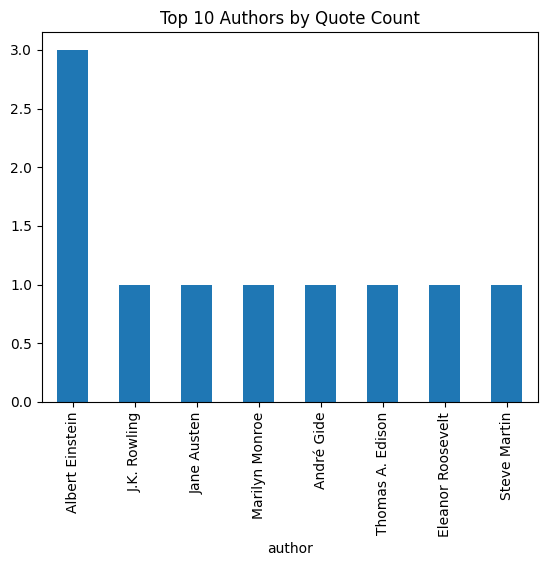

In [4]:
import matplotlib.pyplot as plt

df_quotes["author"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Authors by Quote Count")
plt.show()
# SQL Basics 02: GROUP BY & JOIN